In [1]:
#0
import pandas as pd
import numpy as np

df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv', index_col=[0])

In [2]:
#2.Standardize header names(white spaces and lower case).
column_names = df.columns
cols = []
for colname in df.columns:
    cols.append(colname.lower().replace(' ', '_'))

df.columns = cols

In [3]:
cols = []
for col in df.columns:
  cols.append(col.lower().replace(' ', '_'))
df.columns = cols

In [4]:
#5.Check and deal with NaN values.
#df = df.drop(['vehicle_type'], axis=1)
df['state'] = df['state'].fillna('California')
df['response'] = df['response'].fillna('No')
df['months_since_last_claim'] = df['months_since_last_claim'].fillna(df['months_since_last_claim'].median())
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(df['number_of_open_complaints'].median())
df['vehicle_class'] = df['vehicle_class'].fillna(df['vehicle_class'].mode()[0])
df['vehicle_size'] = df['vehicle_size'].fillna(df['vehicle_size'].mode()[0])
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

In [5]:
#7.BONUS: Put all the previously mentioned data transformations into a function.

In [6]:
def df_cleaner(df):
    df1 = df.copy()
    column_names = df1.columns
    cols = []
    for colname in df1.columns:
        cols.append(colname.lower())
    df1.columns = cols
    df1.columns = df1.columns.str.replace(' ', '_')
    df1 = df1.drop(['vehicle_type'], axis=1)
    df1['state'] = df1['state'].fillna('California')
    df1['response'] = df1['response'].fillna('No')
    df1['months_since_last_claim'] = df1['months_since_last_claim'].fillna(df1['months_since_last_claim'].median())
    df1['number_of_open_complaints'] = df1['number_of_open_complaints'].fillna(df1['number_of_open_complaints'].median())
    df1['vehicle_class'] = df1['vehicle_class'].fillna(df1['vehicle_class'].mode()[0])
    df1['vehicle_size'] = df1['vehicle_size'].fillna(df1['vehicle_size'].mode()[0])
    df1['effective_to_date'] = pd.to_datetime(df1['effective_to_date'], errors='coerce')
    return df1

In [7]:
display(df)
#1.Show DataFrame info.
df.info()
df.isna().sum()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
#2.Describe DataFrame.
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
#3.Show a plot of the total number of responses.

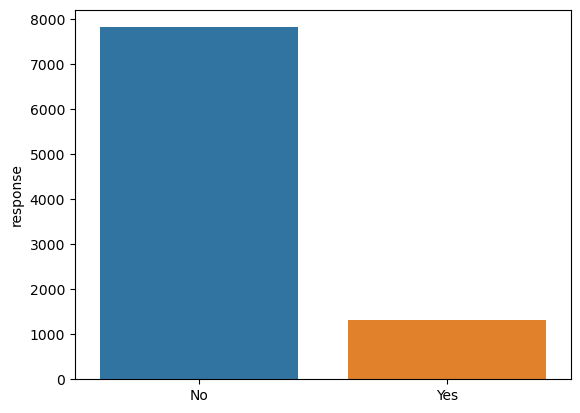

In [10]:
#sns.barplot(data=df, x ='response', y = df['response'].value_counts()) -> I don't know in this way doesn't work
sns.barplot(x=df.response.value_counts().index, y=df.response.value_counts())
#sns.countplot(x='response', data=df) -> Another way to do it
plt.show()

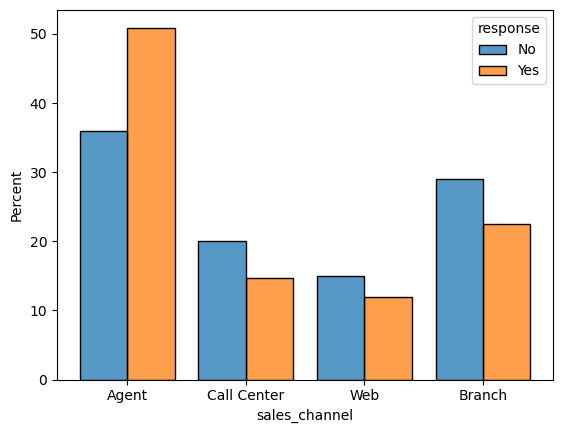

In [11]:
#4.Show a plot of the response rate by the sales channel.
sns.histplot(x = df['sales_channel'], hue=df['response'], multiple="dodge", shrink = 0.8, stat = 'percent', common_norm=False)
plt.show()

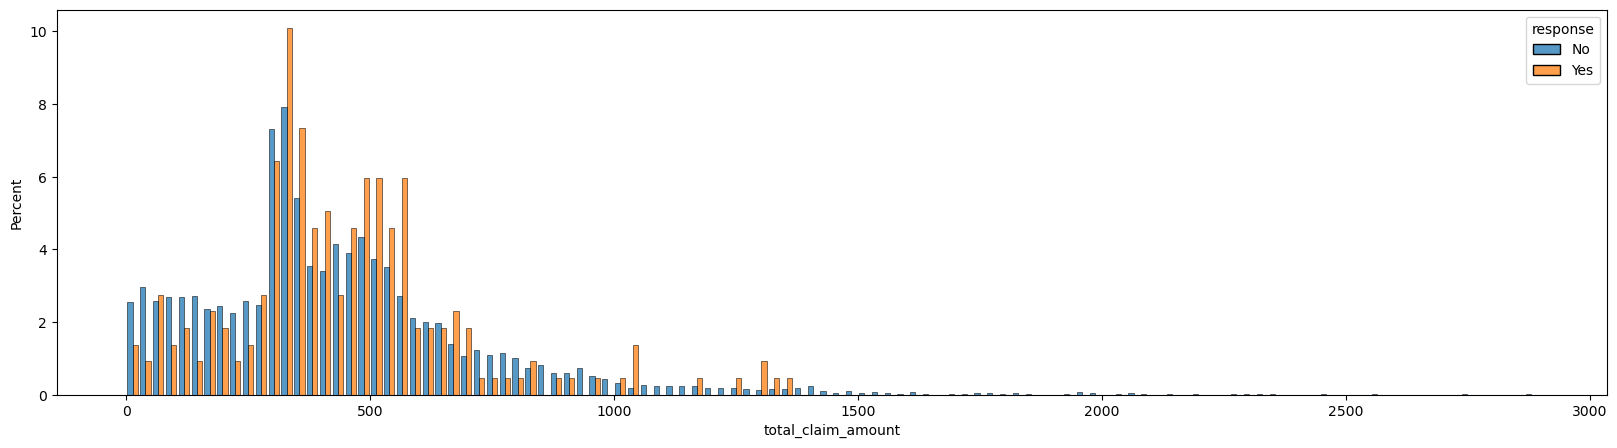

In [12]:
#5.Show a plot of the response rate by the total claim amount.
fig, ax1 = plt.subplots(figsize=(20,5))
sns.histplot(x = df['total_claim_amount'], hue=df['response'], multiple="dodge", shrink = 0.8, stat = 'percent', common_norm=False)
plt.show()

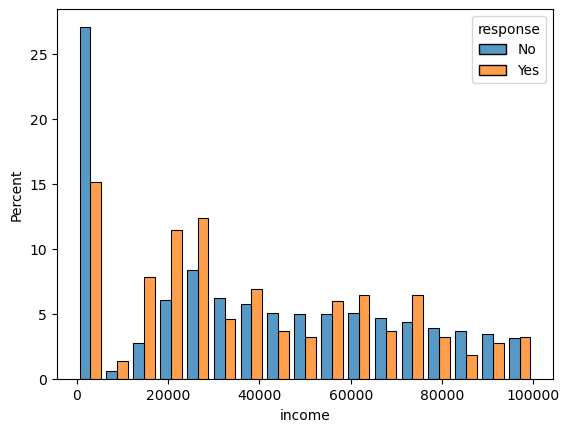

In [13]:
#6.Show a plot of the response rate by income.

sns.histplot(x = df['income'], hue=df['response'], multiple="dodge", shrink = 0.8, stat = 'percent', common_norm=False)
plt.show()